In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import requests

import numpy as np

In [3]:
dfU = pd.read_csv('updatedData.csv')
dfU.head()

,Unnamed: 0,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [4]:
dfU_only_female = dfU[dfU["Gender"] == "FEMALE"]
dfU_only_female.head()

,Unnamed: 0,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [5]:
stage_map = {"I" : 1, "II" : 2, "III" : 3}
dfU['Stage'] = dfU['Tumour_Stage'].map(stage_map)
dfU.head(1)

,Unnamed: 0,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Stage
0,0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.27368,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive,3


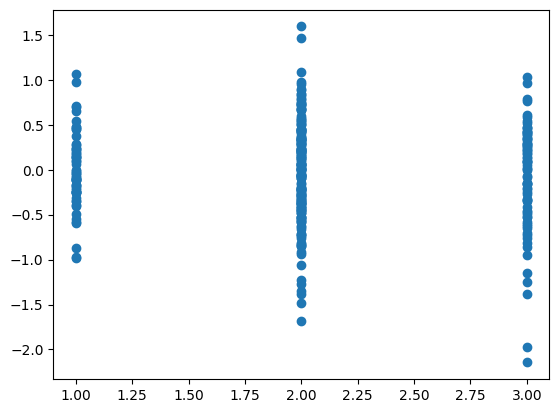

In [6]:
plt.scatter(dfU["Stage"], dfU["Protein1"], linestyle="None")
plt.show()

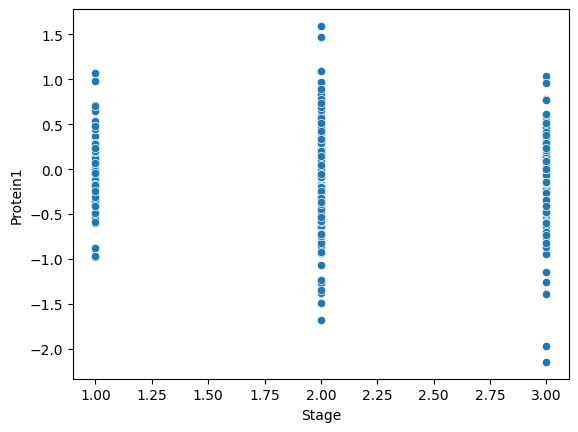

In [7]:
sns.scatterplot(data = dfU, x = "Stage", y = "Protein1")
plt.show()

<AxesSubplot: xlabel='Stage', ylabel='Protein1'>

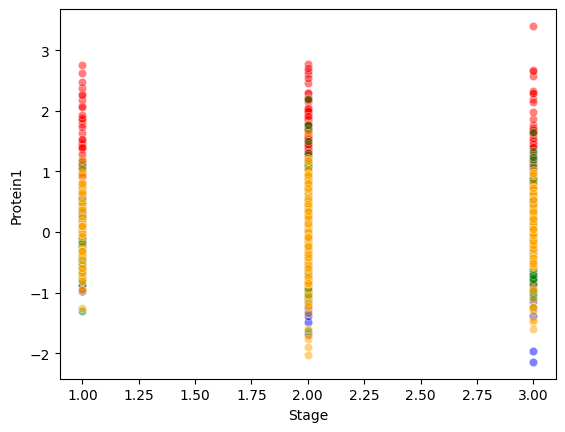

In [8]:
sns.scatterplot(data = dfU, x = "Stage", y = "Protein1", color="blue", alpha=0.5)
sns.scatterplot(data = dfU, x = "Stage", y = "Protein2", color="red", alpha=0.5)
sns.scatterplot(data = dfU, x = "Stage", y = "Protein3", color="green", alpha=0.5)
sns.scatterplot(data = dfU, x = "Stage", y = "Protein4", color="orange", alpha=0.5)

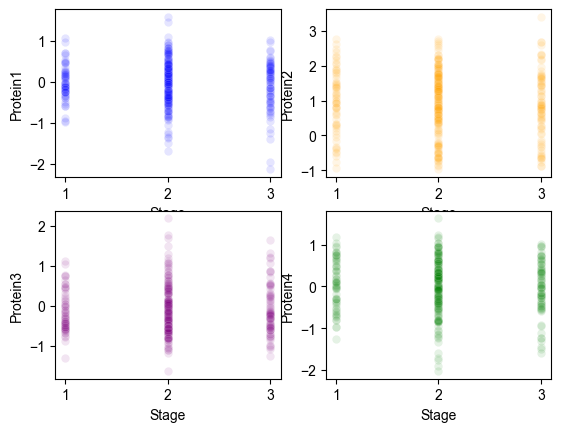

In [9]:
fig, axes = plt.subplots(2,2)
sns.set(rc={'figure.figsize':(20,15)})
sns.scatterplot(ax = axes[0,0], data = dfU, x = "Stage", y = "Protein1", color = "blue", alpha = 0.1)
sns.scatterplot(ax = axes[0,1], data = dfU, x = "Stage", y = "Protein2", color = "orange", alpha=0.1)
sns.scatterplot(ax = axes[1,0], data = dfU, x = "Stage", y = "Protein3", color = "purple", alpha=0.1)
sns.scatterplot(ax = axes[1,1], data = dfU, x = "Stage", y = "Protein4", color = "green", alpha=0.1)
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

In [10]:
df_health = pd.read_csv('health_spending.csv')
df_health.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,HEALTHEXP,TOT,USD_CAP,A,2018,5193.845,NaN
1,AUS,HEALTHEXP,TOT,USD_CAP,A,2019,5130.234,NaN
2,AUS,HEALTHEXP,TOT,USD_CAP,A,2020,5627.315,E
3,AUT,HEALTHEXP,TOT,USD_CAP,A,2018,5518.538,NaN
4,AUT,HEALTHEXP,TOT,USD_CAP,A,2019,5624.014,NaN


In [11]:
df_wait_time = pd.read_csv('waittime.csv')

df_wait_time.head()

,VAR,Variable,UNIT,Measure,COU,Country,YEA,Year,Value,Flag Codes,Flags
0,WAITKNEW,Knee replacement,WTSPMDMT,Waiting times from specialist assessment to tr...,AUS,Australia,2010,2010,173.0,D,Difference in methodology
1,WAITKNEW,Knee replacement,WTSPMDMT,Waiting times from specialist assessment to tr...,AUS,Australia,2011,2011,184.0,D,Difference in methodology
2,WAITKNEW,Knee replacement,WTSPMDMT,Waiting times from specialist assessment to tr...,AUS,Australia,2012,2012,196.0,D,Difference in methodology
3,WAITKNEW,Knee replacement,WTSPMDMT,Waiting times from specialist assessment to tr...,AUS,Australia,2013,2013,194.0,D,Difference in methodology
4,WAITKNEW,Knee replacement,WTSPMDMT,Waiting times from specialist assessment to tr...,AUS,Australia,2014,2014,191.0,D,Difference in methodology


In [12]:
website = "https://restcountries.com/v3.1/alpha/"

response = requests.get("https://restcountries.com/v3.1/alpha/AUS")
country_name = response.json()[0]['name']['common']


In [13]:
def get_country_name(in_df):

    code = in_df["LOCATION"]
    website = "https://restcountries.com/v3.1/alpha/" + code

    response = requests.get(website)
    country_name = response.json()[0]['name']['common']

    return country_name

In [14]:
new_df = pd.DataFrame()

In [15]:
df_health['Country'] = df_health.apply(get_country_name, axis=1)

df_health.head()


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes,Country
0,AUS,HEALTHEXP,TOT,USD_CAP,A,2018,5193.845,NaN,Australia
1,AUS,HEALTHEXP,TOT,USD_CAP,A,2019,5130.234,NaN,Australia
2,AUS,HEALTHEXP,TOT,USD_CAP,A,2020,5627.315,E,Australia
3,AUT,HEALTHEXP,TOT,USD_CAP,A,2018,5518.538,NaN,Austria
4,AUT,HEALTHEXP,TOT,USD_CAP,A,2019,5624.014,NaN,Austria


In [16]:
mini_df_health = df_health[["LOCATION", "Country","TIME", "Value"]]

mini_df_health.head()


,LOCATION,Country,TIME,Value
0,AUS,Australia,2018,5193.845
1,AUS,Australia,2019,5130.234
2,AUS,Australia,2020,5627.315
3,AUT,Austria,2018,5518.538
4,AUT,Austria,2019,5624.014


In [17]:
mini_df_wait_time = df_wait_time[["Variable", "COU", "Country", "YEA", "Year", "Value"]]

mini_df_wait_time.head()

,Variable,COU,Country,YEA,Year,Value
0,Knee replacement,AUS,Australia,2010,2010,173.0
1,Knee replacement,AUS,Australia,2011,2011,184.0
2,Knee replacement,AUS,Australia,2012,2012,196.0
3,Knee replacement,AUS,Australia,2013,2013,194.0
4,Knee replacement,AUS,Australia,2014,2014,191.0
